# Installing Libraries


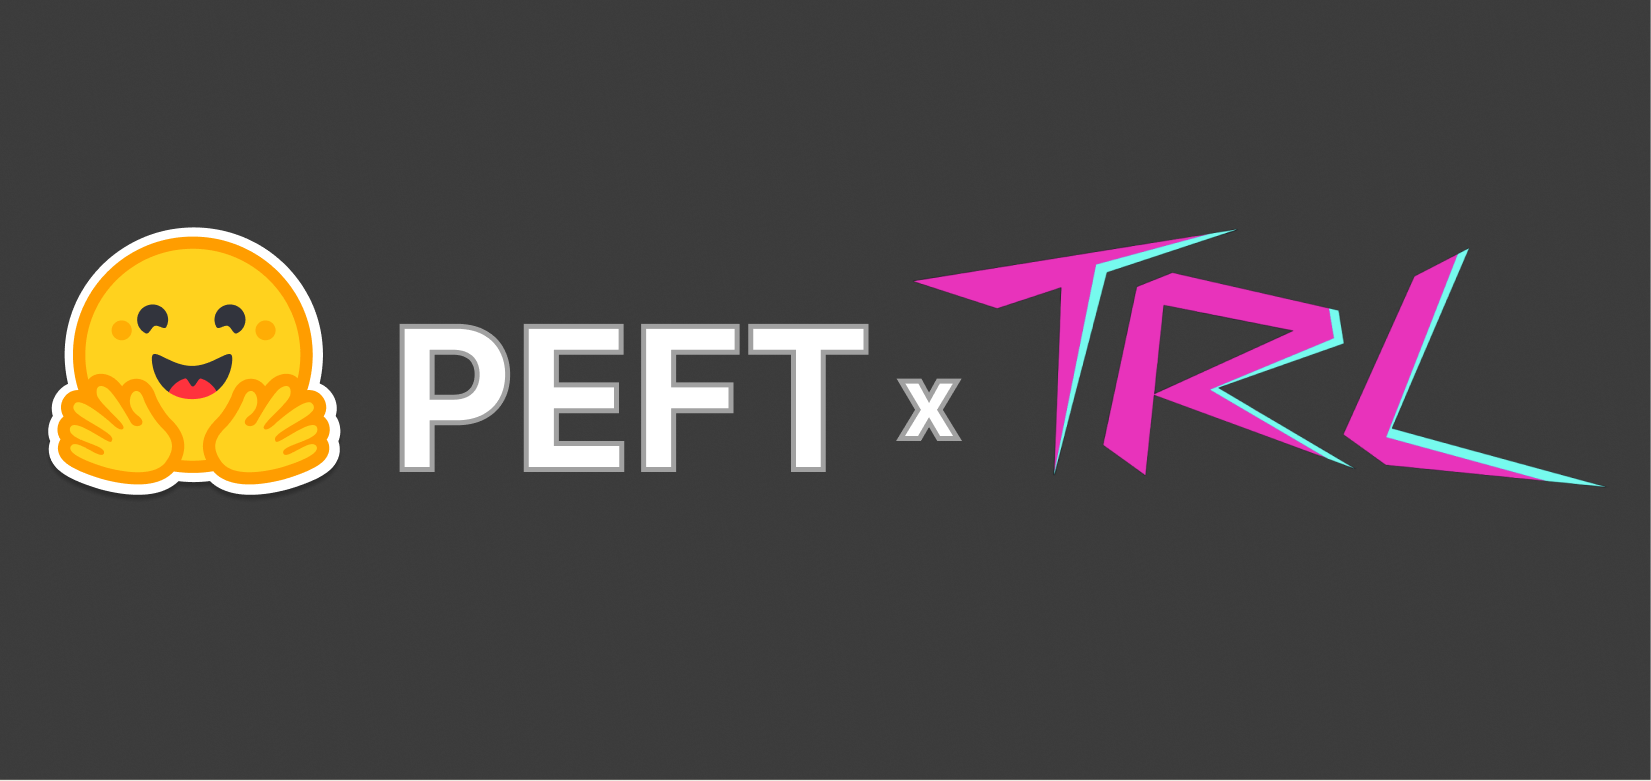

## Datasets

- `datasets` library by huggingface is to get the datasets like (like Alpaca, IMDB, etc.)

- By using this we can use load, process, split, and clean custom datasets easily.

## Trl

- `trl` is Transformers Reinforcement Learning.

- A Hugging Face library specifically for fine-tuning & RLHF (Reinforcement Learning with Human Feedback).

- Implements SFT (Supervised Fine-Tuning), PPO, DPO, and RLHF pipelines with just a few lines.

In [1]:
!pip install datasets trl -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 376.2/376.2 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# HuggingFace Login


- Provide the HuggingFace Reading Token to read the models and datasets available in HuggingFace.

In [2]:
from huggingface_hub import notebook_login
notebook_login()

# Importing Libraries

- `torch` Core PyTorch library for tensor operations and GPU-accelerated deep learning.

- `AutoModelForCausalLM` Automatically loads a pre-trained causal language model for text generation or fine-tuning.

- `AutoTokenizer` Loads the matching tokenizer to convert text into model-readable token IDs and back.

- `Trainer` Hugging Face utility that abstracts training loops for supervised or unsupervised fine-tuning..

- `load_dataset` Loads and prepares datasets (public or custom) efficiently from the Hugging Face dataset library.

- `Dataset` A dataset object type from datasets, allowing slicing, shuffling, and transformations.

- `LoraConfig` Defines configuration for Low-Rank Adaptation (LoRA) to enable parameter-efficient fine-tuning.

- `SFTTrainer` A high-level training class from trl for Supervised Fine-Tuning (SFT) on instruction datasets.

- `SFTConfig` Configuration object to set training hyperparameters specifically for SFTTrainer.

- `PeftModel` Wraps a base model with Parameter-Efficient Fine-Tuning (PEFT) layers such as LoRA or adapters.


In [35]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, Trainer
from datasets import load_dataset, Dataset

from peft import LoraConfig
from transformers import TrainingArguments
from trl import SFTTrainer, SFTConfig
from peft import PeftModel

# Dataset

Loading the Indian IPC Laws dataset.

Dataset link: https://huggingface.co/datasets/NahOR102/Indian-IPC-Laws

In [4]:
dataset_name = 'NahOR102/Indian-IPC-Laws'
dataset = load_dataset(dataset_name, split="train")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


IPC_cleaned_fine_tuning.json: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/1102 [00:00<?, ? examples/s]

In [5]:
dataset

Dataset({
    features: ['messages'],
    num_rows: 1102
})

In [6]:
dataset[0]

{'messages': [{'content': 'You are an expert legal assistant providing accurate answers based on the Indian Penal Code (IPC).',
   'role': 'system'},
  {'content': 'What is IPC 1?', 'role': 'user'},
  {'content': 'IPC 1 (Title and extent of operation of the Code.): This Act shall be called the Indian Penal Code, and shall extend to the whole of India.',
   'role': 'assistant'}]}

# Base Model

Gemma-3 1B model is used for Fine Turning.

In [7]:
model_name = "google/gemma-3-1b-it"

### Load the pretrained casual language model

In [9]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    trust_remote_code=True
)
model.config.use_cache = False

config.json:   0%|          | 0.00/899 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.00G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

### Load the tokenizer

In [10]:
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token

tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

In [11]:
tokenizer.pad_token

'<eos>'


#### Formats conversational messages into a single text string, tokenizes them with padding and truncation, and sets labels as a copy of input_ids for supervised fine-tuning.

In [12]:
def tokenize_function(examples):
  # Format the messages into a single string
  formatted_messages = []
  for conversation in examples["messages"]:
    formatted_conversation = ""
    for message in conversation:
      formatted_conversation += f"{message['role']}: {message['content']}\n"
    formatted_messages.append(formatted_conversation)

  tokens = tokenizer(formatted_messages,
                     truncation=True,
                     max_length=128,
                     padding="max_length")
  tokens["labels"] = tokens["input_ids"].copy()
  return tokens

In [13]:
tokenized_dataset = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/1102 [00:00<?, ? examples/s]

In [14]:
display(tokenized_dataset)

Dataset({
    features: ['messages', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 1102
})

#### Defines the LoRA configuration for causal language modeling by injecting low-rank adapters (r=16, lora_alpha=32) into attention layers (q_proj, v_proj) with dropout (0.05) and no bias tuning.

- `r` sets the rank (adapter size)
- `lora_alpha` scales the adapter updates
- `q_proj/v_proj` are attention projection layers where LoRA is applied to efficiently fine-tune the model.

In [15]:
lora_config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],  # attention layers
    lora_dropout=0.05,
    bias="none",
    task_type="CAUSAL_LM"
)

#### Sets the supervised fine-tuning (SFT) hyperparameters, including sequence length, batch size, gradient accumulation, learning rate, training epochs, logging frequency, and saving strategy.

- `max_length` limits token sequence size
- `output_dir` saves model outputs
- `per_device_train_batch_size` controls samples per step
- `gradient_accumulation_steps` simulates larger batches
- `learning_rate` tunes weight updates
- `num_train_epochs` sets training cycles
- `logging_steps` controls log frequency
- `save_strategy="epoch"` saves the model after each epoch

In [30]:
training_args = SFTConfig(
    max_length=512,
    output_dir="/tmp",
    per_device_train_batch_size=2,
    gradient_accumulation_steps=4,
    learning_rate=2e-4,
    num_train_epochs=3,
    logging_steps=10,
    save_strategy="epoch"
)

#### Initializes the Supervised Fine-Tuning (SFT) trainer with the base model, tokenized training dataset.

- `peft_config` Lora Configurations.
- `training_args` defining Hyperparameters.

In [31]:
trainer = SFTTrainer(
    model=model,
    train_dataset=tokenized_dataset,
    peft_config=lora_config,
    args=training_args

)

Truncating train dataset:   0%|          | 0/1102 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


#### Creates a generic Hugging Face Trainer to fine-tune the model using the specified training arguments (training_args) and the prepared tokenized dataset.

In [ ]:
trainer = Trainer(
    model=model,
    args = training_args,
    train_dataset = tokenized_dataset
)

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


#### Training the model

In [32]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: mohankrishce to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


It is strongly recommended to train Gemma3 models with the `eager` attention implementation instead of `sdpa`. Use `eager` with `AutoModelForCausalLM.from_pretrained('<path-to-checkpoint>', attn_implementation='eager')`.


Step,Training Loss
10,2.722800
20,1.482200
30,1.188200
40,0.768900
50,0.974700
60,0.701900
70,0.741400
80,0.632800
90,0.571300
100,0.647300


wandb: WARNING The get_url method is deprecated and will be removed in a future release. Please use `run.url` instead.


TrainOutput(global_step=414, training_loss=0.6682097186212954, metrics={'train_runtime': 981.5789, 'train_samples_per_second': 3.368, 'train_steps_per_second': 0.422, 'total_flos': 1775749208408064.0, 'train_loss': 0.6682097186212954})

### Saves the fine-tuned LoRA adapter weights to the specified directory.

In [33]:
trainer.save_model("./sft_lora_model")

### Loads the saved LoRA adapter weights into the base model for inference or merging.

In [36]:
model = PeftModel.from_pretrained(model, "./sft_lora_model")

/usr/local/lib/python3.11/dist-packages/peft/tuners/tuners_utils.py:190: UserWarning: Already found a `peft_config` attribute in the model. This will lead to having multiple adapters in the model. Make sure to know what you are doing!
  warnings.warn(


### Merges LoRA adapter weights with the base model and removes adapter layers, producing a standalone fine-tuned model for deployment

In [37]:
model = model.merge_and_unload()

In [38]:
model

Gemma3ForCausalLM(
  (model): Gemma3TextModel(
    (embed_tokens): Gemma3TextScaledWordEmbedding(262144, 1152, padding_idx=0)
    (layers): ModuleList(
      (0-25): 26 x Gemma3DecoderLayer(
        (self_attn): Gemma3Attention(
          (q_proj): Linear(in_features=1152, out_features=1024, bias=False)
          (k_proj): Linear(in_features=1152, out_features=256, bias=False)
          (v_proj): Linear(in_features=1152, out_features=256, bias=False)
          (o_proj): Linear(in_features=1024, out_features=1152, bias=False)
          (q_norm): Gemma3RMSNorm((256,), eps=1e-06)
          (k_norm): Gemma3RMSNorm((256,), eps=1e-06)
        )
        (mlp): Gemma3MLP(
          (gate_proj): Linear(in_features=1152, out_features=6912, bias=False)
          (up_proj): Linear(in_features=1152, out_features=6912, bias=False)
          (down_proj): Linear(in_features=6912, out_features=1152, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): Gemma3RMSNorm((11

#### Save the Base model + Lora weights combined for both `model` and `Tokenizer`

In [39]:
model.save_pretrained("./sft_merged_model")
tokenizer.save_pretrained("./sft_merged_model")

('./sft_merged_model/tokenizer_config.json',
 './sft_merged_model/special_tokens_map.json',
 './sft_merged_model/chat_template.jinja',
 './sft_merged_model/tokenizer.model',
 './sft_merged_model/added_tokens.json',
 './sft_merged_model/tokenizer.json')

#### Downloads the tokenizer associated with the google/gemma-3-1b-it model and saves it to the ./sft_merged_model directory, ensuring the fine-tuned model uses the correct tokenization scheme during inference.

In [40]:
AutoTokenizer.from_pretrained("google/gemma-3-1b-it").save_pretrained("./sft_merged_model")

('./sft_merged_model/tokenizer_config.json',
 './sft_merged_model/special_tokens_map.json',
 './sft_merged_model/chat_template.jinja',
 './sft_merged_model/tokenizer.model',
 './sft_merged_model/added_tokens.json',
 './sft_merged_model/tokenizer.json')

# Upload to HuggingFace Hub with the Write Token.

In [41]:
from huggingface_hub import notebook_login
notebook_login()

In [42]:
model.push_to_hub("Mohan-08/Indian-IPC-FT",
                  use_auth_token=True,
                  safe_serialization=True,
                  max_shard_size="5GB")
tokenizer.push_to_hub("Mohan-08/Indian-IPC-FT", use_auth_token=True)

/usr/local/lib/python3.11/dist-packages/transformers/utils/hub.py:907: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Mohan-08/Indian-IPC-FT/commit/3f32e176e9ce0ef191e09126bcef5880055e8d13', commit_message='Upload tokenizer', commit_description='', oid='3f32e176e9ce0ef191e09126bcef5880055e8d13', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Mohan-08/Indian-IPC-FT', endpoint='https://huggingface.co', repo_type='model', repo_id='Mohan-08/Indian-IPC-FT'), pr_revision=None, pr_num=None)

# Inference


Inferencing the model with the HuggingFace read token.

In [43]:
from huggingface_hub import notebook_login
notebook_login()

In [44]:
model = AutoModelForCausalLM.from_pretrained("Mohan-08/Indian-IPC-FT")
tokenizer = AutoTokenizer.from_pretrained("Mohan-08/Indian-IPC-FT")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/4.00G [00:00<?, ?B/s]

The following generation flags are not valid and may be ignored: ['cache_implementation']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['cache_implementation']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Gemma3ForCausalLM(
  (model): Gemma3TextModel(
    (embed_tokens): Gemma3TextScaledWordEmbedding(262144, 1152, padding_idx=0)
    (layers): ModuleList(
      (0-25): 26 x Gemma3DecoderLayer(
        (self_attn): Gemma3Attention(
          (q_proj): Linear(in_features=1152, out_features=1024, bias=False)
          (k_proj): Linear(in_features=1152, out_features=256, bias=False)
          (v_proj): Linear(in_features=1152, out_features=256, bias=False)
          (o_proj): Linear(in_features=1024, out_features=1152, bias=False)
          (q_norm): Gemma3RMSNorm((256,), eps=1e-06)
          (k_norm): Gemma3RMSNorm((256,), eps=1e-06)
        )
        (mlp): Gemma3MLP(
          (gate_proj): Linear(in_features=1152, out_features=6912, bias=False)
          (up_proj): Linear(in_features=1152, out_features=6912, bias=False)
          (down_proj): Linear(in_features=6912, out_features=1152, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): Gemma3RMSNorm((11

In [46]:
# Define your input prompt
prompt = "What is IPC 30"

# Encode the prompt
input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

# Generate text
output = model.generate(input_ids, max_length=200, num_return_sequences=1)

# Decode and print the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

W0717 14:24:56.775000 1418 torch/_inductor/utils.py:1137] [0/0] Not enough SMs to use max_autotune_gemm mode


What is IPC 30 (Revised)?
IPC 30 (Revised) defines "the law for protection for the criminal offense when the offence is committed, or is about to be committed". It’s used when in reviewing the IPC.

What is IPC 30 (Revised) about?
IPC 30 (Revised) deals with the protection of crimes, if those crimes are about to happen in the future or have already been committed.


It’s used when in reviewing the IPC.
When in reviewing the IPC, this will find that the offence is about to happen when the offence has already been committed.
This will only apply when that specific offence is about to happen..

Does it say that an offence will be prosecuted and punished if it is about to happen?
Yes.

Would an actor be liable for IPC 30 (Revised) as an accomplice to a crime, even if the actor is not a perpetrator of the crime?

